## Домашняя работа

Вам дан датасет с данными о маркетинговой компании.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign


### Easy (+0.1)

Посчитать:

- Количество жалоб
- Средний возраст покупателей. Покупатель - тот, кто совершал хотя бы одну покупку за последние два года (колонки Mnt*). Отличается ли он от среднего возраста всех людей в датасете?

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as sklp

In [5]:
df = pd.read_csv('../data/marketing_campaign.csv', sep=';', index_col=0)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,13.06.2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,10.06.2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,25.01.2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0


In [6]:

complains = sum(df['Complain'])
print('Количество жалоб: ', complains)

Количество жалоб:  21


In [7]:
print('Средний возраст клиентов: ', int(
    df
    .apply(lambda x: 2024 - x['Year_Birth'], axis=1)
    .mean()
))
print('Средний возраст покупателей: ', int(
    df
    .apply(lambda x: 2024 - x['Year_Birth'], axis=1)
    .where(df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] > 0)
    .mean()
))

Средний возраст клиентов:  55
Средний возраст покупателей:  55


Отличий нет, т.к. датасет состоит только из покупателей


### Medium (+0.4)

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- возраст

Кратко напишите выводы.

In [22]:
features = {
    'Education': 'category',
    'Marital_Status': 'category',
    'Education_Number': 'number',
    'Marital_Status_Number': 'number',
    'Income': 'number',
    'Kidhome': 'number',
    'Teenhome': 'number',
    'Recency': 'number',
    'NumWebPurchases': 'number',
    'NumStorePurchases': 'number',
    'Age': 'number',
}
features_list = list(features.keys())
features_number = [feature for feature in features_list if features[feature] == 'number']
features_category = [feature for feature in features_list if features[feature] == 'category']

sns.set_theme(style="ticks")
cmap = sns.cubehelix_palette(start=3, light=1, as_cmap=True)

corrected_df = df

encoder = sklp.LabelEncoder()

corrected_df['Age'] = 2024 - corrected_df['Year_Birth']
corrected_df['Education_Number'] = encoder.fit_transform(corrected_df['Education']) + 1
corrected_df['Marital_Status_Number'] = encoder.fit_transform(corrected_df['Marital_Status']) + 1

corrected_df = corrected_df[features_list]
corrected_df

,Education,Marital_Status,Education_Number,Marital_Status_Number,Income,Kidhome,Teenhome,Recency,NumWebPurchases,NumStorePurchases,Age
ID,,,,,,,,,,,
5524,Graduation,Single,3,5,58138.0,0,0,58,8,4,67
2174,Graduation,Single,3,5,46344.0,1,1,38,1,2,70
4141,Graduation,Together,3,6,71613.0,0,0,26,8,10,59
6182,Graduation,Together,3,6,26646.0,1,0,26,2,4,40
5324,PhD,Married,5,4,58293.0,1,0,94,5,6,43
...,...,...,...,...,...,...,...,...,...,...,...
10870,Graduation,Married,3,4,61223.0,0,1,46,9,4,57
4001,PhD,Together,5,6,64014.0,2,1,56,8,5,78
7270,Graduation,Divorced,3,3,56981.0,0,0,91,2,13,43


Корреляция между численными фичами:
                       Education_Number  Marital_Status_Number    Income  \
Education_Number               1.000000               0.007090  0.120692   
Marital_Status_Number          0.007090               1.000000  0.021353   
Income                         0.120692               0.021353  1.000000   
Kidhome                       -0.045564              -0.022553 -0.428669   
Teenhome                       0.118485              -0.003596  0.019133   
Recency                       -0.011728               0.014159 -0.003970   
NumWebPurchases                0.081908              -0.001894  0.387878   
NumStorePurchases              0.070483               0.001412  0.529362   
Age                            0.171390               0.060580  0.161791   

                        Kidhome  Teenhome   Recency  NumWebPurchases  \
Education_Number      -0.045564  0.118485 -0.011728         0.081908   
Marital_Status_Number -0.022553 -0.003596  0.014159        

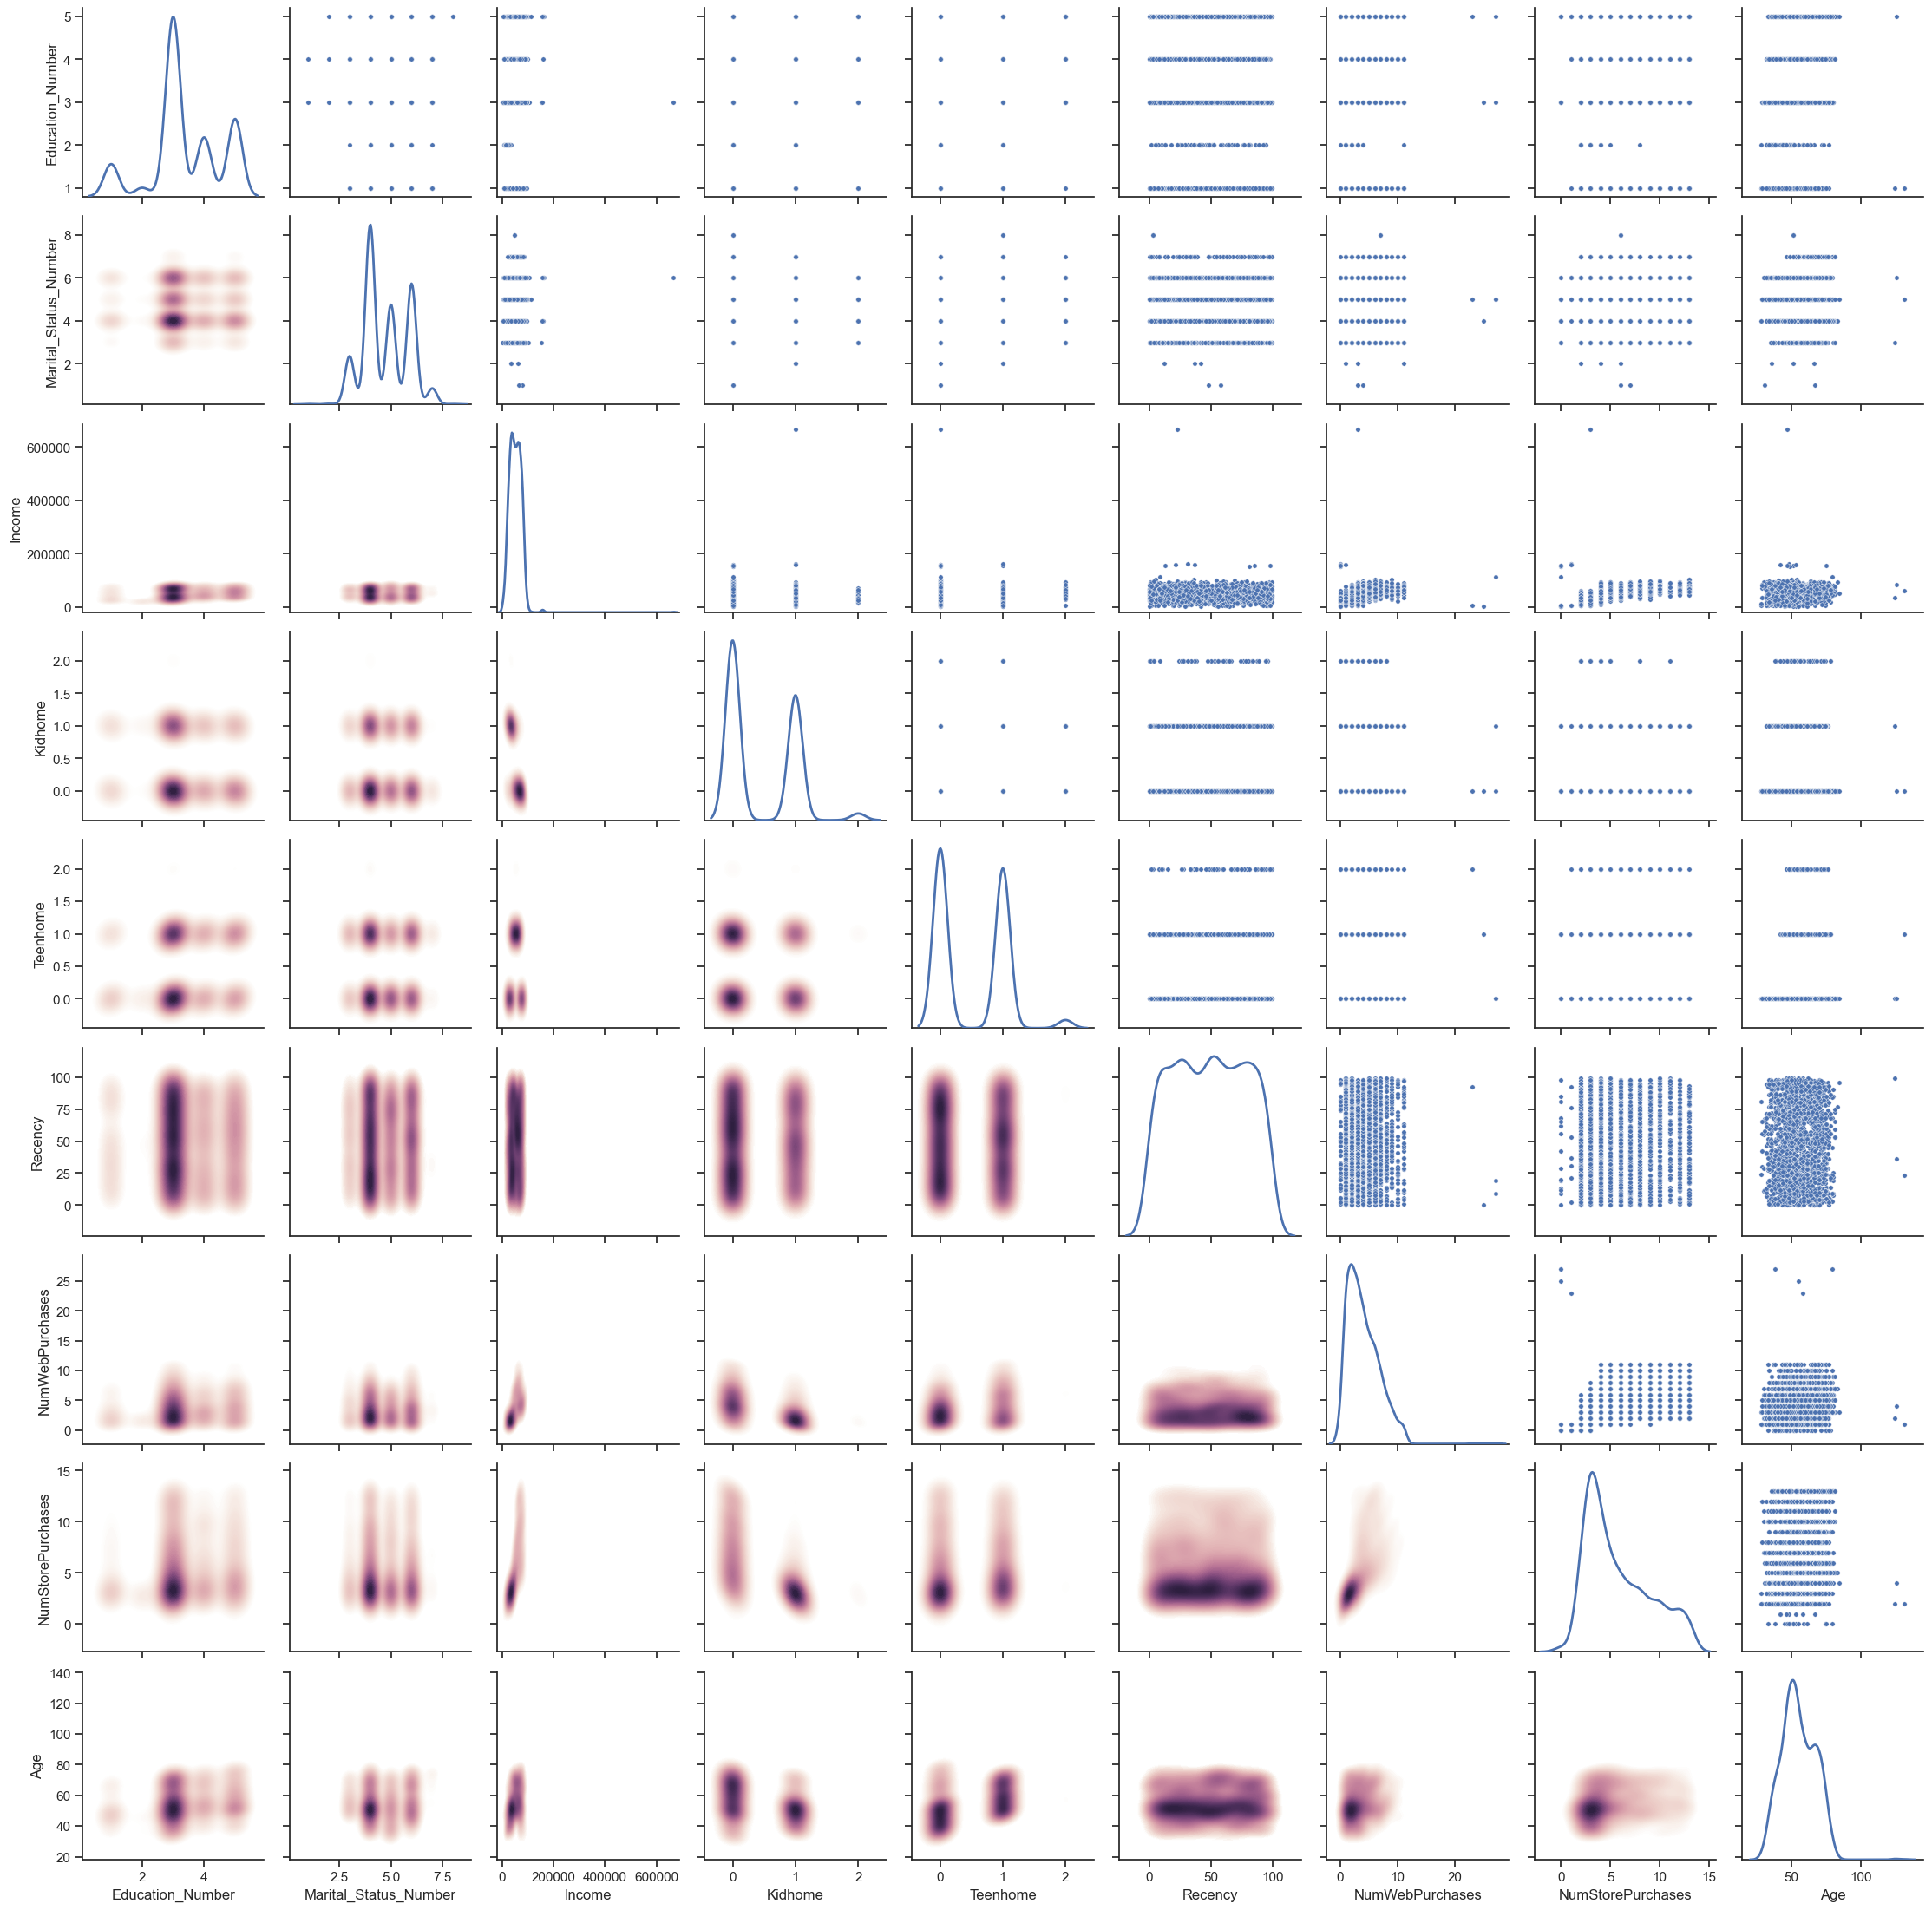

In [18]:
# number - number
# Kde is slow but beautiful (~ 1min). Scatter is fast but not so beautiful (~ 5s)
print(f'Корреляция между численными фичами:\n{corrected_df[features_number].corr()}')

is_kde = True
g_number = sns.PairGrid(
    corrected_df[features_number],
    diag_sharey=False
)
if is_kde:
    g_number.map_lower(sns.kdeplot, fill=True, levels=100, cmap=cmap)
    g_number.map_upper(sns.scatterplot, s=15)
    g_number.map_diag(sns.kdeplot, lw=2)
else:
    g_number.map_upper(sns.scatterplot, s=15)
    g_number.map_lower(sns.scatterplot, s=15)
    g_number.map_diag(sns.scatterplot)

Заметно, что есть корреляция между следующими парами:
- `Income` - `NumStorePurchases`
- `Income` - `NumWebPurchases` (хотя и таблица коррелиция говорит о слабой зависимости, графики показывают, что она есть)
- `Income` - `Kidhome` (забавно, что при этом почти нет зависимости между возрастом и доходом)

- `Kidhome` - `NumStorePurchases`
- `Kidhome` - `NumWebPurchases` (почему-то те кто имеют детей закупаются меньше)

- `Age` - `Kidhome`
- `Age` - `Teenhome` (ну тут всё очев)

- `NumStorePurchases` - `NumWebPurchases` (те, кто закупаются больше - закупаются больше (ну, вы поняли))

Корреляция между численными и категориальными фичами:
None


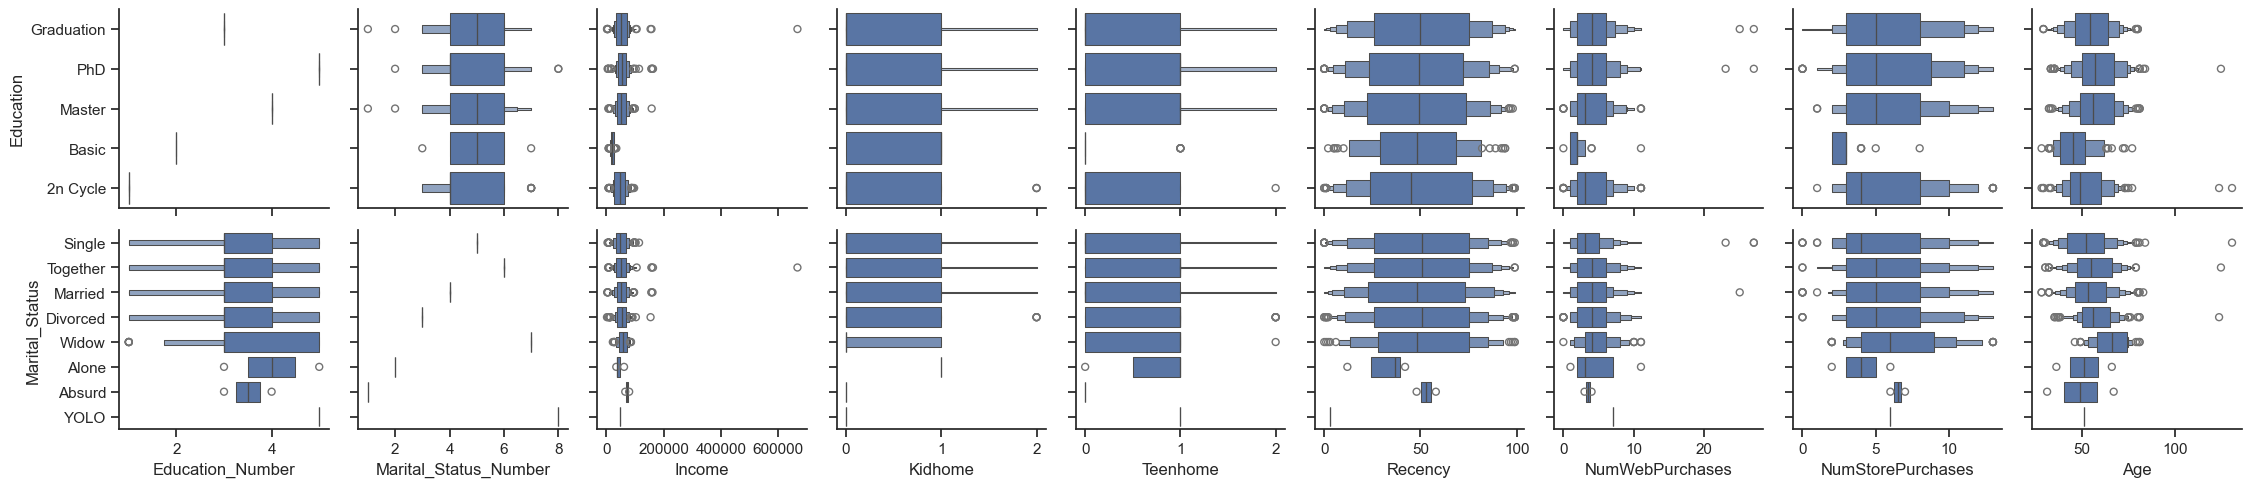

In [19]:
# category - number
print(f'Корреляция между численными и категориальными фичами:\n{None}')

g_number_categorical = sns.PairGrid(
    corrected_df,
    diag_sharey=False,
    x_vars=features_number,
    y_vars=features_category
)
g_number_categorical.map(sns.boxenplot)

Легко найти ещё две зависимости:
- `Age` - `Marital_Status` (тут всё понятно и немного грустно)
- `Age` - `Education` (забавно, что `PhD` и `Master` получаются по статистике в одном возрасте)

Корреляция между категориальными фичами:
None


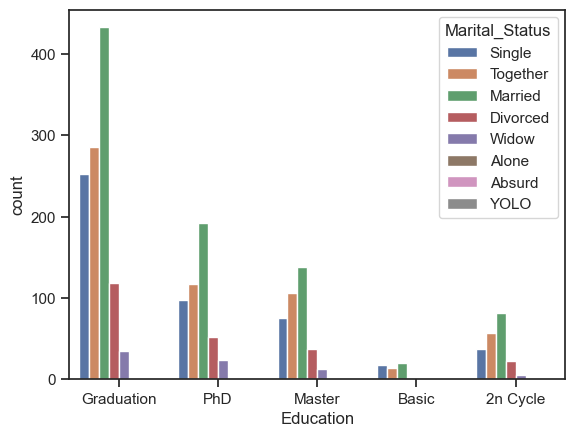

In [20]:
# category - category
print(f'Корреляция между категориальными фичами:\n{None}')

g_category_categorical = sns.countplot(data=corrected_df, x='Education', hue='Marital_Status')

Ну тут всё очев - соотношения всегда примерно одинаковы. Единственное, что можно сказать, это то, что на `Phd` после `Master` обычно идут люди не порабощённые брачными отношениями.


### Hard (+ в карму)

Вы - аналитик в магазине. Маркетологи сказали, что следующую компанию хотели бы запустить на целевую аудиторию магазина.

Предложите подход как понять, что такое "целевая аудитория", обоснуйте его при помощи данных и найдите ID покупателей, которые относятся к ним.

Вне зависимости от графиков, ответ всегда прост:
- В первую очередь - дети
- Во вторую - пожилые люди
- В третью - молодые девушки
- В четвёртую - все остальные

Разберём категорию `все остельные`. За базис возмём людей, что:
1. много покупают
2. много получают (ъотя это и следует из первого)

Из базиса получим:
1. в семье не должно быть детей (подростки терпимы)
2. люди постарше (они получают в среднем больше и покупают в среднем больше) - 60-80 лет